In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import linear_model

In [2]:
points = [[0,0],[2.967,0.526],[5.904,1.15],[8.843,1.639],[10.307,-1.194],[7.739,-1.835],[3.422,-2.418]]
points_x = []
points_y = []
for i in points:
    points_x.append(i[0])
    points_y.append(i[1])
    
points_x = np.array(points_x).reshape(-1,1)
points_y = np.array(points_y).reshape(-1,1)

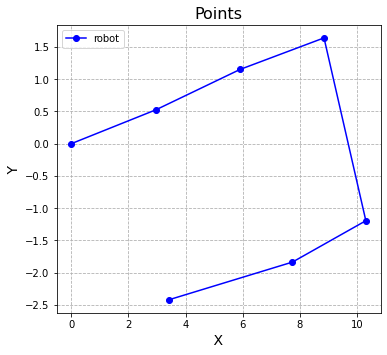

In [3]:
fig = plt.figure()
ax=fig.add_axes([0,0,0.75,1])
ax.set_title("Points",fontsize=16)
ax.set_xlabel(" X ",fontsize=14)
ax.set_ylabel(" Y ",fontsize=14)

plt.plot(points_x,points_y,'-ob',label="robot")

plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [4]:
regression = linear_model.LinearRegression(fit_intercept = True)
regression.fit(points_x[:4],points_y[:4])
Coefficients_L = regression.coef_
Ïnercept_L = regression.intercept_
print("Coefficients_L: \n", Coefficients_L)
print("Ïnercept_L: \n", Ïnercept_L)

Coefficients_L: 
 [[0.18804355]]
Ïnercept_L: 
 [-0.00400086]


In [5]:
pred_x = []
pred_y = []
for i in range (10):
    pred_x.append(i)
    pred_y.append(Coefficients_L*i + Ïnercept_L)
    
pred_x = np.array(pred_x).reshape(-1,1)
pred_y = np.array(pred_y).reshape(-1,1)

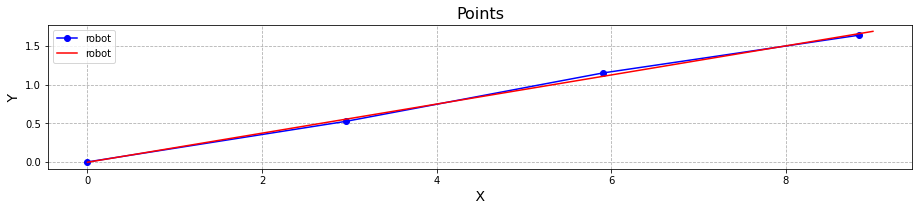

In [6]:
fig = plt.figure()
ax=fig.add_axes([0,0,2,0.5])
ax.set_title("Points",fontsize=16)
ax.set_xlabel(" X ",fontsize=14)
ax.set_ylabel(" Y ",fontsize=14)

plt.plot(points_x[:4],points_y[:4],'-ob',label="robot")
plt.plot(pred_x,pred_y,'-r',label="robot")

plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [7]:
pi = math.pi
theta = np.arctan(Coefficients_L[0][0])*180/pi
theta

10.649737672104656

In [24]:
H_o_1 = np.array([[1, 0, 0, points[0][0]],
                  [0, 1, 0, points[0][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_2 = np.array([[1, 0, 0, points[1][0]],
                  [0, 1, 0, points[1][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_3 = np.array([[1, 0, 0, points[2][0]],
                  [0, 1, 0, points[2][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_4 = np.array([[1, 0, 0, points[3][0]],
                  [0, 1, 0, points[3][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_5 = np.array([[1, 0, 0, points[4][0]],
                  [0, 1, 0, points[4][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_6 = np.array([[1, 0, 0, points[5][0]],
                  [0, 1, 0, points[5][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
H_o_7 = np.array([[1, 0, 0, points[6][0]],
                  [0, 1, 0, points[6][1]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

H_o_l = np.array([[np.cos(theta*pi/180), -np.sin(theta*pi/180), 0, 0],
                  [np.sin(theta*pi/180), np.cos(theta*pi/180), 0, Ïnercept_L[0]],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])

In [25]:
def H_inv(H):
    R = np.array([H[0][0:3],
                  H[1][0:3],
                  H[2][0:3]])

    t = np.array([H[0][3],
                  H[1][3],
                  H[2][3]])

    R_T = np.transpose(R) 
    x = np.transpose(np.matmul(R_T,-t).reshape(1,3))
    y = np.concatenate((R_T,x), axis = 1)

    H_inv = np.concatenate((y,np.array([[0, 0, 0, 1]])), axis = 0)
    return H_inv

In [26]:
H_l_o = H_inv(H_o_l)
H_l_1 = np.matmul(H_l_o,H_o_1)
H_l_2 = np.matmul(H_l_o,H_o_2)
H_l_3 = np.matmul(H_l_o,H_o_3)
H_l_4 = np.matmul(H_l_o,H_o_4)
H_l_5 = np.matmul(H_l_o,H_o_5)
H_l_6 = np.matmul(H_l_o,H_o_6)
H_l_7 = np.matmul(H_l_o,H_o_7)

point_1 = [H_l_1[0][3],H_l_1[1][3]]
point_2 = [H_l_2[0][3],H_l_2[1][3]]
point_3 = [H_l_3[0][3],H_l_3[1][3]]
point_4 = [H_l_4[0][3],H_l_4[1][3]]
point_5 = [H_l_5[0][3],H_l_5[1][3]]
point_6 = [H_l_6[0][3],H_l_6[1][3]]
point_7 = [H_l_7[0][3],H_l_7[1][3]]

points_new = [point_1,point_2,point_3,point_4,point_5,point_6,point_7]
points_new

[[0.0007393763348809876, 0.003931942041221528],
 [3.013840866515092, -0.027443364710898033],
 [6.015569944166841, 0.0430374438825154],
 [8.9943159576489, -0.01952602121283986],
 [9.909547686115646, -3.074282293521283],
 [7.267321014238976, -3.229663162432285],
 [2.916939018682377, -3.0048198998314737]]